<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/ProblemSet3_Simulating_the_Spread_of_Disease_and_Virus_Population_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Set3: Modelagem computacional para simulação de uma virose**

O problema proposto é parte do curso MITx 6.00.2x - *Introduction to Computational Thinking and Data Science*, o "**Problem Set3**" diz respeito a simulação da propagação de um vírus num paciente, considerando-se a possibilidade de tratamento com determinados medicamentos e o desenvolvimento de resistência a tais e tais medicamentos por parte do vírus.

O objetivo é modelar estocasticamente a dinâmica da população de vírus ao longo do tempo, levando em conta a reprodução do vírus, a eliminação natural pelo sistema imunológico e os efeitos do tratamento.

A simulação implementada em Python, utiliza classes para representar o vírus (`SimpleVirus` e `ResistantVirus`) e o paciente (`Patient` e `TreatedPatient`). As classes `ResistantVirus` e `TreatedPatient`, respectivamente, são extensões  das classes `SimpleVirus` e `Patient`, incorporando a lógica de resistência a medicamentos e tratamento.

O problema exige a implementação de métodos para simular a reprodução do vírus, a eliminação do vírus, a administração de medicamentos e a atualização do estado do paciente a cada intervalo de tempo. Adicionalmente, é apresentada uma mesma solução com o uso da biblioteca NumPy para otimizar as operações numéricas, especialmente em simulações com grande número de vírus ou medicamentos.

A resolução do problema permitirá compreender a dinâmica de uma infecção viral, analisando-se o impacto do tratamento na população de vírus, considerando diferentes cenários de resistência a medicamentos.

# **Problema 1: Implementação da Simulação de uma Virose sem medicamentos**

O problema proposto visa simular a propagação de um vírus em um paciente sem a utilização de medicamentos. O objetivo é entender a dinâmica do vírus, como ele se reproduz e como é eliminado do organismo, em um ambiente sem intervenção médica. Para tal, são propostas a implementação de duas classes principais:

1) `class SimpleVirus`: Representa um vírus simples, com características como probabilidade de reprodução (`maxBirthProb`) e probabilidade de ser eliminado do corpo (`clearProb`). Essa classe possui métodos para verificar se o vírus é eliminado (`doesClear`) e para simular a reprodução (`reproduce`), considerando a densidade populacional do vírus no paciente.

2) `class Patient`: Representa o paciente infectado pelo vírus, a classe armazena uma lista de vírus (`viruses`) e a população máxima de vírus que o paciente pode suportar (`maxPop`). O método `update` simula um passo de tempo na simulação, atualizando o estado dos vírus no paciente (eliminação e reprodução).

A ideia é que, ao final, seja possível simular e plotar a progressão da infecção no paciente ao longo do tempo, sem a utilização de medicamentos, observando como a população de vírus varia a cada passo da simulação.

Essa simulação, apesar de simplificada, serve como base para a construção de modelos mais complexos, que levem em consideração o tratamento com medicamentos e a resistência do vírus a esses medicamentos.

In [86]:
# Problem Set 3: Simulating the Spread of Disease and Virus Population Dynamics
import random
import pylab
import numpy as np
import logging
logging.basicConfig(level=logging.INFO)

## **Classe `NoChildException`**

A classe de exceção `NoChildException` também é usada para sinalizar que o vírus não gerou descendentes no intervalo de tempo considerado, sendo útil para controlar o fluxo da simulação no nível da classe `Patient`.

In [87]:
class NoChildException(Exception):
    """
    Define uma exceção personalizada para indicar que uma partícula viral não conseguiu se reproduzir.
    É utilizada no método reproduce da classe SimpleVirus.
    """
pass

# **1) Classe `SimpleVirus`**

A classe `SimpleVirus` representa um vírus individual e modela duas propriedades principais:
* **Reprodução**: A probabilidade máxima do vírus se reproduzir, representada por `maxBirthProb`.
* **Eliminação**: A probabilidade máxima do vírus ser eliminado do corpo, representada por `clearProb`.

O método `__init__` é um construtor da classe que inicializa os valores de `maxBirthProb` e `clearProb` para a instância do vírus. Esses valores devem ser passados ao criar uma nova instância do vírus.

O método `doesClear` utiliza a função `random.random()` (para gerar um número aleatório entre 0 e 1) de modo a determinar se o vírus será eliminado do corpo. Se o número aleatório for menor ou igual à probabilidade de eliminação (`clearProb`), o vírus é eliminado (`True`), caso contrário, sobreviverá (`False`).

### **Função `reproduce`**

A função `reproduce` modela a reprodução de uma partícula viral baseada na probabilidade estocástica.
A probabilidade de reprodução é reduzida à medida que a densidade populacional (`popDensity`) aumenta,  refletindo a limitação de recursos no ambiente (como células hospedeiras) para suportar uma alta taxa de reprodução.

**Parâmetros:**

* `popDensity`: Representa a densidade da população viral no corpo do paciente, calculada como a proporção entre a população atual de vírus e a capacidade máxima de suporte. Uma densidade populacional mais alta implica em menos recursos disponíveis para reprodução, reduzindo a probabilidade de sucesso.

**Lógica de Decisão:**

A função utiliza `random.random()` para gerar um número aleatório entre 0 e 1, se esse número for menor ou igual à probabilidade de reprodução calculada, o vírus se reproduz, criando uma nova instância de `SimpleVirus` com os mesmos atributos do vírus original. Do contrário, uma exceção `NoChildException` é lançada, indicando que o vírus não se reproduziu naquele intervalo de tempo.

**Reprodução Condicional:**

A probabilidade de reprodução é dada pela fórmula:
Probabilidade de reprodução `= maxBirthProb × (1 − popDensity)`

Onde:
* `maxBirthProb` é a taxa máxima de reprodução em condições ideais (densidade populacional próxima de zero).
* `popDensity` é a densidade da população viral atual.


In [88]:
class SimpleVirus(object):
    def __init__(self, maxBirthProb, clearProb):
        """
        Inicializa uma instância de SimpleVirus.

        Parâmetros:
        - maxBirthProb: Probabilidade máxima de reprodução do vírus (float entre 0 e 1).
        - clearProb: Probabilidade de o vírus ser eliminado (float entre 0 e 1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """
        Retorna a probabilidade máxima de reprodução do vírus.
        """
        return self.maxBirthProb

    def getClearProb(self):
        """
        Retorna a probabilidade de o vírus ser eliminado.
        """
        return self.clearProb

    def doesClear(self):
        """
        Determina estocasticamente se o vírus será eliminado.

        Retorna:
        - True: Se o vírus for eliminado, com base em `self.clearProb`.
        - False: Caso contrário.
        """
        return random.random() <= self.clearProb

    def reproduce(self, popDensity):
        """
        Determina estocasticamente se o vírus se reproduz.

        Parâmetros:
        - popDensity: Densidade populacional do vírus (razão entre a população atual e a máxima permitida).

        Retorna:
        - Uma nova instância de `SimpleVirus` se a reprodução for bem-sucedida.

        Lança:
        - NoChildException: Se a reprodução não ocorrer.
        """
        if random.random() <= self.maxBirthProb * (1 - popDensity):
            logging.info("Vírus reproduziu.")
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        else:
            logging.info("Vírus não reproduziu.")
            raise NoChildException("In reproduce()")

# **2) Classe `Patient`**

Modela o comportamento de um paciente infectado, gerenciando uma lista de partículas virais (`viruses`) e uma população máxima permitida (`maxPop`).

O método `update` simula o comportamento viral em cada intervalo de tempo:
* Determina quais partículas sobrevivem.
* Calcula a densidade populacional.
* Simula a reprodução das partículas sobreviventes.

O modelo reflete a dinâmica de populações virais de forma estocástica, considerando a competição por recursos (representada pela densidade populacional).

In [89]:
class Patient(object):
    def __init__(self, viruses, maxPop):
        """
        Inicializa uma instância de Patient.

        Parâmetros:
        - viruses: Lista inicial de partículas virais (instâncias de `SimpleVirus`).
        - maxPop: População máxima permitida de vírus no paciente.
        """
        self.viruses = viruses
        self.maxPop = maxPop

    def getViruses(self):
        """
        Retorna a lista atual de partículas virais.
        """
        return self.viruses

    def getMaxPop(self):
        """
        Retorna a população máxima permitida de vírus no paciente.
        """
        return self.maxPop

    def getTotalPop(self):
        """
        Retorna o número total de partículas virais no paciente.
        """
        return len(self.viruses)

    def update(self):
        """
        Atualiza o estado da população viral em um intervalo de tempo.

        Passos:
        1. Determina quais partículas virais sobrevivem (não são eliminadas).
        2. Calcula a densidade populacional com base nos vírus sobreviventes.
        3. Tenta reproduzir cada vírus sobrevivente, adicionando novos vírus à população.
        4. Atualiza a lista de vírus no paciente.

        Retorna:
        - O número total de partículas virais após a atualização.
        """
        # Lista de vírus sobreviventes
        surviving_viruses = []
        for virus in self.viruses:
            if not virus.doesClear():
                surviving_viruses.append(virus)

        # Calcula a densidade populacional
        popDensity = len(surviving_viruses) / self.maxPop

        # Lista de novos vírus
        new_viruses = []
        for virus in surviving_viruses:
            try:
                new_viruses.append(virus.reproduce(popDensity))
            except NoChildException:
                pass

        # Atualiza a população de vírus
        self.viruses = surviving_viruses + new_viruses

        # Retorna o número total de vírus
        return self.getTotalPop()

## **Classe `TestSimpleVirus`**

A biblioteca `unittest` fornece ferramentas para escrever e executar testes, de modo a verificar o comportamento classes em Python. Testes unitários são importantes para garantir a qualidade do código e prevenir erros.

* `class TestSimpleVirus(unittest.TestCase)`: define uma classe de teste chamada `TestSimpleVirus`, a qual herda de `unittest.TestCase`, o que permite usar métodos e asserções para verificar o comportamento do código.

* `def test_initialization(self)`:  este método testa a inicialização da classe `SimpleVirus`, cria um objeto SimpleVirus e usa `assertEqual()` para verificar se os atributos `maxBirthProb` e `clearProb` foram inicializados com os valores corretos.

* `def test_reproduce(self)`: Este método testa o método `reproduce()` da classe `SimpleVirus`, verificando se a exceção `NoChildException` é levantada quando o método `reproduce()` é chamado com uma densidade populacional de 1.0, simulando uma situação em que o vírus não deve se reproduzir.

* `if __name__ == "__main__":`: Este bloco de código executa os testes quando o script é executado diretamente (ou seja, não importado como um módulo), carregando os testes da classe `TestSimpleVirus`, e os executa usando `unittest.TextTestRunner()`.


In [90]:
import unittest  # Importa a biblioteca para criação de testes unitários

class TestSimpleVirus(unittest.TestCase):  # Define uma classe para os testes da classe SimpleVirus
    """
    Classe de teste para a classe SimpleVirus.
    """
    def test_initialization(self):
        """
        Testa se o construtor da classe SimpleVirus inicializa os atributos corretamente.
        """
        virus = SimpleVirus(0.1, 0.2)  # Cria uma instância de SimpleVirus com valores específicos
        self.assertEqual(virus.getMaxBirthProb(), 0.1)  # Verifica se maxBirthProb foi inicializado corretamente
        self.assertEqual(virus.getClearProb(), 0.2)  # Verifica se clearProb foi inicializado corretamente

    def test_reproduce(self):
        """
        Testa se o método reproduce() da classe SimpleVirus levanta a exceção NoChildException
        quando a densidade populacional é 1.0.
        """
        virus = SimpleVirus(0.1, 0.2)  # Cria uma instância de SimpleVirus
        self.assertRaises(NoChildException, virus.reproduce, 1.0)  # Verifica se a exceção é levantada

if __name__ == "__main__":  # Executa os testes quando o script é executado diretamente
    suite = unittest.TestLoader().loadTestsFromTestCase(TestSimpleVirus)  # Carrega os testes da classe TestSimpleVirus
    unittest.TextTestRunner().run(suite)  # Executa os testes e exibe os resultados

..
----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK


## **Função `simulationWithoutDrug`**

A função `simulationWithoutDrug` simula a dinâmica da população viral em um paciente durante 300 tentativas (`numTrials`), de modo a calcular a média do tamanho da população viral ao longo do tempo.

**Parâmetros sugeridos para simulação**:

* `numViruses = 100`: Quantidade inicial de vírus no paciente.
* `maxPop = 1000`: População máxima sustentável de vírus no paciente.
* `maxBirthProb = 0.1`: Probabilidade máxima de reprodução de um vírus.
* `clearProb = 0.05`: Probabilidade máxima de eliminação de um vírus.

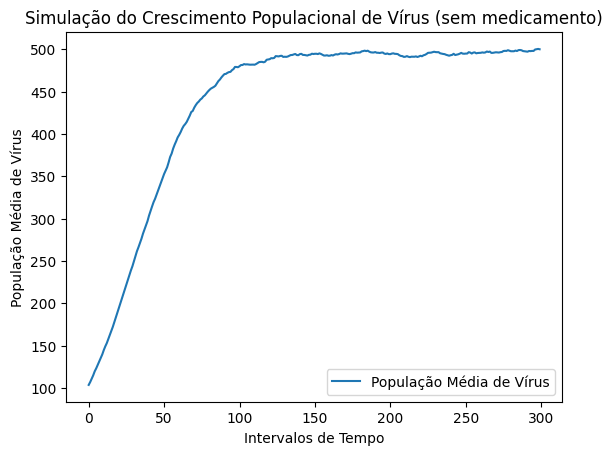

In [91]:
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials, steps=300):
    results = [0] * steps
    for trial in range(numTrials):
        logging.info(f"Executando simulação {trial + 1} de {numTrials}")
        viruses = [SimpleVirus(maxBirthProb, clearProb) for _ in range(numViruses)]
        patient = Patient(viruses, maxPop)
        for step in range(steps):
            results[step] += patient.update()
    return [r / numTrials for r in results]

def plotResults(results):
    pylab.plot(results, label="População Média de Vírus")
    pylab.title("Simulação do Crescimento Populacional de Vírus (sem medicamento)")
    pylab.xlabel("Intervalos de Tempo")
    pylab.ylabel("População Média de Vírus")
    pylab.legend(loc="best")
    pylab.show()

# Teste simples
def testSimulation():
    results = simulationWithoutDrug(10, 100, 0.99, 0.01, 1)
    assert all(r > 0 for r in results), "Os resultados devem ser positivos."
    logging.info("Teste concluído com sucesso.")

# Chamada do código principal
if __name__ == "__main__":
    results = simulationWithoutDrug(numViruses=100, maxPop=1000, maxBirthProb=0.1, clearProb=0.05, numTrials=100)
    plotResults(results)

## **Implantando a função `simulationWithoutDrug` com NumPy**

A biblioteca NumPy realiza cálculos numéricos de forma eficiente, especialmente para lidar com arrays multidimensionais. O uso de arrays NumPy permite realizar operações vetorizadas, por isto o código se torna mais eficiente do que usar listas do Python para armazenar os resultados. Desta forma o código teve seu desempenho otimizado.

* `np.zeros((numTrials, steps))`: cria um array NumPy bidimensional preenchido com zeros. Este array armazena os resultados da simulação para cada etapa de tempo em cada tentativa.

* `np.mean(resultados, axis=0)`: calcula a média dos resultados da simulação ao longo do eixo 0 (ou seja, a média em cada etapa de tempo em todas as tentativas). A função `np.mean()` oferece uma maneira eficiente de calcular a média de arrays, especialmente para arrays grandes.

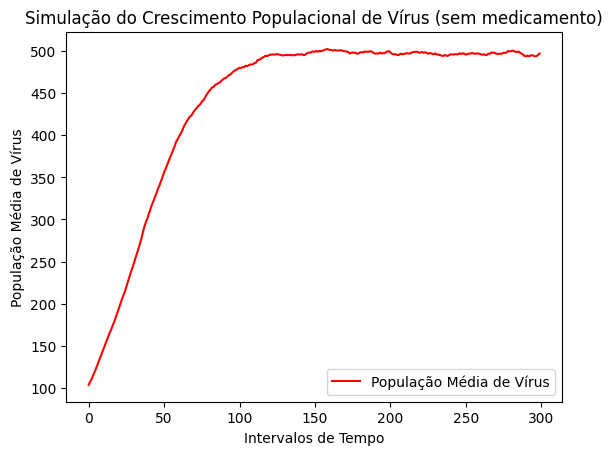

In [92]:
def createViruses(numViruses, maxBirthProb, clearProb):
    """
    Cria uma lista de objetos SimpleVirus.

    Parâmetros:
        numViruses (int): Número de vírus a serem criados.
        maxBirthProb (float): Probabilidade máxima de reprodução do vírus.
        clearProb (float): Probabilidade de eliminação do vírus.

    Retorna:
        list: Lista de objetos SimpleVirus.
    """
    return [SimpleVirus(maxBirthProb, clearProb) for _ in range(numViruses)]

def simulateStep(patient):
    """
    Simula uma etapa de tempo na simulação, atualizando o estado do paciente.

    Parâmetros:
        patient (Patient): Objeto Patient a ser atualizado.

    Retorna:
        int: Número total de vírus no paciente após a atualização.
    """
    return patient.update()

def calculateAverage(resultados):
    """
    Calcula a média dos resultados da simulação ao longo de múltiplas tentativas.

    Parâmetros:
        resultados (numpy.ndarray): Array NumPy com os resultados de cada tentativa.

    Retorna:
        numpy.ndarray: Array NumPy com a média dos resultados em cada etapa de tempo.
    """
    return np.mean(resultados, axis=0)

def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials):
    """
    Simula a propagação de vírus sem tratamento de medicamentos.

    Parâmetros:
        numViruses (int): Número inicial de vírus.
        maxPop (int): População máxima de vírus.
        maxBirthProb (float): Probabilidade de reprodução do vírus.
        clearProb (float): Probabilidade de eliminação do vírus.
        numTrials (int): Número de simulações.

    Retorna:
        numpy.ndarray: Array com a média da população de vírus em cada passo de tempo.
    """
    # Validação da entrada
    if not isinstance(numViruses, int) or numViruses <= 0:
        raise ValueError("numViruses deve ser um número inteiro positivo.")
    if not isinstance(maxPop, int) or maxPop <= 0:
        raise ValueError("maxPop deve ser um número inteiro positivo.")
    if not isinstance(maxBirthProb, float) or maxBirthProb < 0 or maxBirthProb > 1:
        raise ValueError("maxBirthProb deve estar entre 0 e 1.")
    # ... (outras validações)

    steps = 300
    resultados = np.zeros((numTrials, steps))  # Cria um array NumPy para armazenar os resultados

    for i in range(numTrials):
        virus = createViruses(numViruses, maxBirthProb, clearProb)
        patient = Patient(virus, maxPop)
        for step in range(steps):
            resultados[i, step] = simulateStep(patient)

    return calculateAverage(resultados)

def plotResults(resultados):
    """
    Plota os resultados da simulação usando Pylab.

    Parâmetros:
        resultados (numpy.ndarray): Array NumPy com a média da população de vírus em cada etapa de tempo.
    """
    pylab.plot(resultados, label="População Média de Vírus", c='r')
    pylab.title("Simulação do Crescimento Populacional de Vírus (sem medicamento)")
    pylab.xlabel("Intervalos de Tempo")
    pylab.ylabel("População Média de Vírus")
    pylab.legend(loc="best")
    pylab.show()

if __name__ == "__main__":
    resultados = simulationWithoutDrug(numViruses=100, maxPop=1000, maxBirthProb=0.1, clearProb=0.05, numTrials=100)
    plotResults(resultados)

No gráfico acima observa-se que o crescimento da população viral ocorre exponencialmente de início, estabilizando-se após um certo número de etapas temporais - em aproximadamente 150 time-steps, o gráfico começa a apresentar uma estabilização clara, com pequenas flutuações em torno de um valor constante (~500). O platô indica que a população atingiu um equilíbrio dinâmico, em que o número de vírus que sendo eliminados, compensam o número de vírus em reprodução no organismo.

## **Problema 2: Implementação da Simulação de uma Virose com medicamentos**

Nesta parte, o código desenvolvido considerará os efeitos da administração de medicamentos ao paciente e a capacidade da descendência de partículas virais de herdar ou sofrer mutações em traços genéticos que conferem resistência a medicamentos. À medida que a população de vírus se reproduz, mutações ocorrerão na descendência do vírus, adicionando diversidade genética à população de vírus. Algumas partículas de vírus ganham mutações favoráveis que conferem resistência a medicamentos.

## **Classe `ResistantVirus`**

A classe `ResistantVirus` modela, estocasticamente, uma partícula viral com capacidade de desenvolver resistência a medicamentos através de mutações genéticas. Ou seja, modela quais medicamentos afetam o vírus já resistentes a determinados medicamentos em uso, devido a mutações genéticas (surgimento de novas versões do vírus mais resistentes).

É uma classe derivada de `SimpleVirus`, herdando as funcionalidades básicas como probabilidade de reprodução e eliminação, contendo alguns atributos adicionais para para lidar com resistências e mutações:

* `resistances`: um dicionário que indica os medicamentos aos quais o vírus é resistente (chave: nome_do_medicamento, valor: True ou False).
* `mutProb`: é a probabilidade de que um vírus ganhe  resistência, sofrendo mutações ao se reproduzir.

### **A função `reproduce`**

Esta função determina, de forma estocástica, se o vírus irá se reproduzir em um dado intervalo de tempo. Portanto, a reprodução e as mutações são baseadas em números aleatórios, o que nos permite a **simulação de processos biológicos reais**.

**Parâmetros**:

* `popDensity`: A densidade populacional, representando a proporção da população viral em relação à capacidade máxima do ambiente (impacta a probabilidade de reprodução).
* `activeDrugs`: Lista de medicamentos atualmente em uso no paciente.

**Lógica de funcionamento**:

Primeiro, verifica se o vírus é resistente a todos os medicamentos ativos, usando `all(self.isResistantTo(d) for d in activeDrugs`). Em seguida, calcula a probabilidade de reprodução, `self.getMaxBirthProb() * (1 - popDensity)`.

Se as condições de resistência e probabilidade forem satisfeitas, um novo dicionário `resistances` é criado para a descendência.

Uma nova instância de `ResistantVirus` é retornada com os atributos herdados e o dicionário `resistances`é atualizado.

Caso contrário, é levantada a exceção `NoChildException`, quando o vírus não pode se reproduzir devido a falta de resistência aos medicamentos ativos ou a alta densidade populacional, que reduz a probabilidade de reprodução.

Para cada medicamento no dicionário `resistances`, há uma chance de `mutProb` inverter o estado da resistência (True → False ou False → True).

In [93]:
# Define a classe ResistantVirus como uma subclasse de SimpleVirus
class ResistantVirus(SimpleVirus):
    """
    Representação de um vírus resistente a medicamentos.
    """

    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):
        """
        Inicializa uma nova instância de ResistantVirus.

        Parâmetros:
            maxBirthProb (float): Probabilidade máxima de reprodução.
            clearProb (float): Probabilidade de eliminação.
            resistances (dict): Resistências do vírus (medicamento: True/False).
            mutProb (float): Probabilidade de mutação.
        """
        if not isinstance(resistances, dict):
            raise ValueError("Resistances deve ser um dicionário.")
        if not (0 <= mutProb <= 1):
            raise ValueError("Mutation probability deve estar entre 0 e 1.")

        super().__init__(maxBirthProb, clearProb)
        self.resistances = resistances
        self.mutProb = mutProb

    def getResistances(self):
        """
        Retorna o dicionário de resistências do vírus.
        """
        return self.resistances.copy()

    def getMutProb(self):
        """
        Retorna a probabilidade de mutação do vírus.
        """
        return self.mutProb

    def isResistantTo(self, drug):
        """
        Verifica se o vírus é resistente a um medicamento.

        Parâmetros:
            drug (str): Nome do medicamento.

        Retorno:
            bool: True se resistente, False caso contrário.
        """
        return self.resistances.get(drug, False)

    def reproduce(self, popDensity, activeDrugs):
        """
        Determina estocasticamente se este vírus se reproduz em um dado intervalo de tempo.

        Parâmetros:
            popDensity (float): Densidade populacional do vírus.
            activeDrugs (list): Uma lista de medicamentos atualmente ativos no paciente.
        Retorna:
            ResistantVirus: Uma nova instância de ResistantVirus representando a descendência.
        Exceções:
            NoChildException: Se o vírus não se reproduzir.
        """
        # Verifica se o vírus é resistente a todos os medicamentos ativos
        if (not activeDrugs or all(self.isResistantTo(d) for d in activeDrugs)) and \
           random.random() <= self.getMaxBirthProb() * (1 - popDensity):  # Verifica a probabilidade de reprodução

            # Cria um novo dicionário de resistências para a descendência, considerando a probabilidade de mutação
            resistances = {
                drug: (not is_resistant if random.random() <= self.mutProb else is_resistant)
                for drug, is_resistant in self.resistances.items()
            }
            return ResistantVirus(self.getMaxBirthProb(), self.getClearProb(), resistances, self.mutProb)

        raise NoChildException("O vírus não se reproduziu devido à resistência ou restrições populacionais.")

## **Classe `ResistantVirus` usando NumPy**

Neste caso, o construtor inicializa o objeto `ResistantVirus`, valida os parâmetros de entrada, e chama o construtor da classe pai (`super().__init__(maxBirthProb, clearProb)`) para inicializar os atributos herdados de `SimpleVirus`, convertendo as `resistances` em arrays NumPy:
* `self.drugs = np.array(list(resistances.keys()))`: cria array NumPy com os nomes dos medicamentos.
* `self.resistances = np.array(list(resistances.values()))`: cria array NumPy com os valores booleanos de resistência.

**Método `reproduce`**

Quando o vírus puder se reproduzir, são calculadas as mutações:
* `mutations = np.random.random(len(self.drugs)) <= self.mutProb`: Gera um array de valores booleanos aleatórios, onde cada valor indica se um medicamento é eficaz.
* `new_resistances = np.where(mutations, np.logical_not(self.resistances), self.resistances)`: cria um novo array de resistências, invertendo os valores booleanos quando são verificadas mutações.

É criado um novo dicionário de resistências:
* `resistances_dict = dict(zip(self.drugs, new_resistances))`: que combina os nomes dos medicamentos com os novos valores de resistência, que retorna um novo objeto `ResistantVirus` com as novas resistências. Se o vírus não puder se reproduzir, uma exceção é levantada.



In [94]:
class ResistantVirus(SimpleVirus):
    """
    Representação de um vírus simples com resistência a medicamentos.
    """
    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):
        """
        Inicializa uma nova instância de ResistantVirus.

        Parâmetros:
            maxBirthProb (float): Probabilidade máxima de reprodução.
            clearProb (float): Probabilidade de eliminação.
            resistances (dict): Um dicionário de pares {medicamento: booleano}
                                 indicando as resistências do vírus.
            mutProb (float): Probabilidade de uma mutação ocorrer em um novo vírus.
        """
        if not isinstance(resistances, dict):
            raise ValueError("Resistances devem ser um dicionário.")
        if not (0 <= mutProb <= 1):
            raise ValueError("A probabilidade de mutação deve estar entre 0 e 1.")

        super().__init__(maxBirthProb, clearProb)

        # Converte as resistências para arrays NumPy
        self.drugs = np.array(list(resistances.keys()))
        self.resistances = np.array(list(resistances.values()))
        self.mutProb = mutProb

    def getResistances(self):
        """
        Retorna um dicionário de resistências a medicamentos do vírus.
        """
        return dict(zip(self.drugs, self.resistances))

    def getMutProb(self):
        """
        Retorna a probabilidade de mutação do vírus.
        """
        return self.mutProb

    def isResistantTo(self, drug):
        """
        Retorna True se este vírus é resistente ao medicamento, False caso contrário.
        """
        return self.resistances[self.drugs == drug][0] if drug in self.drugs else False

    def reproduce(self, popDensity, activeDrugs):
        """
        Determina estocasticamente se este vírus se reproduz em um intervalo de tempo.

        Parâmetros:
            popDensity (float): Densidade populacional do vírus.
            activeDrugs (list): Uma lista de medicamentos atualmente ativos no paciente.

        Retorna:
            ResistantVirus: Uma nova instância de ResistantVirus representando a descendência.

        Exceções:
            NoChildException: Se o vírus não se reproduzir.
        """
        # Verifica se o vírus é resistente a todos os medicamentos ativos
        if (not activeDrugs or all(self.isResistantTo(d) for d in activeDrugs)) and \
           np.random.random() <= self.getMaxBirthProb() * (1 - popDensity):

            # Calcula mutações
            mutations = np.random.random(len(self.drugs)) <= self.mutProb
            new_resistances = np.where(mutations, np.logical_not(self.resistances), self.resistances)

            # Cria um novo dicionário de resistências
            resistances_dict = dict(zip(self.drugs, new_resistances))

            return ResistantVirus(self.getMaxBirthProb(), self.getClearProb(), resistances_dict, self.mutProb)

        raise NoChildException("O vírus não se reproduziu devido à resistência ou restrições populacionais.")

## **Problema 3: Implantação de Simulação de Medicamentos Administrados ao Paciente**

O problema exige a implementação da classe `TreatedPatient` e seus métodos, considerando a interação com a classe `ResistantVirus` (que modela vírus com resistência a medicamentos) e a lógica de como os medicamentos afetam a reprodução dos vírus.

A classe `TreatedPatient`, herdada da classe `Patient`, deve gerenciar uma lista de medicamentos que são administrados ao paciente e como esses medicamentos afetam a população de vírus, especialmente aqueles com resistência. O objetivo é simular um paciente que está sendo tratado com medicamentos para combater um vírus.

A classe deve ter um método `addPrescription()` para adicionar medicamentos à lista de medicamentos ativos do paciente. Os medicamentos impedem a reprodução de vírus que não são resistentes a eles, mas não os matam diretamente.

## **Implantação da classe `TreatedPatient`**

In [95]:
class TreatedPatient(Patient):
    """
    Representação de um paciente tratado com medicamentos.
    """
    def __init__(self, viruses, maxPop):
        """
        Inicializa uma nova instância de TreatedPatient.

        Parâmetros:
            viruses (list): Lista de vírus.
            maxPop (int): População máxima permitida.
        """
        super().__init__(viruses, maxPop)
        self.drugs = []

    def addPrescription(self, newDrug):
        """
        Adiciona um medicamento à lista de prescrições.

        Parâmetros:
            newDrug (str): Nome do medicamento.
        """
        if not isinstance(newDrug, str):
            raise ValueError("O nome do medicamento deve ser uma string.")
        if newDrug not in self.drugs:
            self.drugs.append(newDrug)

    def getPrescriptions(self):
        """
        Retorna a lista de medicamentos ativos.

        Retorno:
            list: Lista de medicamentos.
        """
        return self.drugs

    def getResistPop(self, drugResist):
        """
        Retorna a população viral resistente a medicamentos.

        Parâmetros:
            drugResist (list): Lista de medicamentos.

        Retorno:
            int: Número de vírus resistentes.
        """
        ###  return len([v for v in self.viruses if all(v.isResistantTo(d) for d in drugResist)])
        # Verifica se a lista de medicamentos está vazia
        if not drugResist:
            return len(self.viruses)  # Se vazia, todos são considerados 'resistentes'

        # Conta os vírus resistentes a todos os medicamentos na lista
        resistant_count = 0
        for virus in self.viruses:
            is_resistant = True  # Assume que o vírus é resistente inicialmente
            for drug in drugResist:
                if not virus.isResistantTo(drug):  # Se não é resistente a um medicamento, muda a flag
                    is_resistant = False
                    break  # Sai do loop interno, pois já sabemos que não é resistente a todos
            if is_resistant:  # Se passou por todos os medicamentos e ainda é resistente
                resistant_count += 1
        return resistant_count

    def update(self):
        """
        Atualiza a população viral no paciente.

        Retorno:
            int: Tamanho total da população viral.
        """
        # Remove vírus eliminados
        self.viruses = [v for v in self.viruses if not v.doesClear()]

        # Calcula densidade populacional
        popDensity = len(self.viruses) / float(self.maxPop)

        # Reproduz vírus
        for v in self.viruses[:]:  # Cria uma cópia da lista para evitar conflitos
            try:
                # Cria uma cópia do vírus para evitar problemas de mutabilidade
                new_virus = v.reproduce(popDensity, self.getPrescriptions())
                self.viruses.append(v.reproduce(popDensity, self.getPrescriptions()))
            except NoChildException:
                pass

        return len(self.viruses)

## **Implantação da classe `TreatedPatient` com NumPy**

In [96]:
class TreatedPatient(Patient):
    """
    Representação de um paciente em tratamento com medicamentos.
    """

    def __init__(self, viruses, maxPop):
        """
        Inicializa um novo TreatedPatient.

        Parâmetros:
            viruses (list): Lista de vírus com os quais o paciente está infectado.
            maxPop (int): População máxima de vírus que o paciente pode suportar.
        """
        super().__init__(viruses, maxPop)
        self.drugs = []

    def addPrescription(self, newDrug):
        """
        Adiciona um novo medicamento à lista de medicamentos do paciente.

        Parâmetros:
            newDrug (str): Nome do novo medicamento.
        """
        if not isinstance(newDrug, str):
            raise ValueError("The drug name must be a string.")
        if newDrug not in self.drugs:
            self.drugs.append(newDrug)

    def getPrescriptions(self):
        """
        Retorna a lista de medicamentos do paciente.

        Retorna:
            list: Lista de medicamentos.
        """
        return self.drugs

    def getResistPop(self, drugResistances):
        """
        Obtém o número de vírus resistentes a uma lista de medicamentos.

        Parâmetros:
            drugResistances (list): Lista de medicamentos.

        Retorna:
            int: Número de vírus resistentes a todos os medicamentos na lista.
        """
        if not self.viruses:  # Trata o caso de lista de vírus vazia
            return 0

        virus_resistances = np.array([v.getResistances() for v in self.viruses])
        drug_resistances_array = np.array(drugResistances)
        resistant_count = np.sum(np.all(np.isin(drug_resistances_array, virus_resistances), axis=1))
        return resistant_count

    def update(self):
        """
        Atualiza o estado do paciente, considerando a eliminação e reprodução dos vírus,
        e o efeito dos medicamentos.

        Retorna:
            int: Número total de vírus restantes após a atualização.
        """
        self.viruses = [v for v in self.viruses if not v.doesClear()]
        popDensity = len(self.viruses) / float(self.maxPop)

        new_viruses = []
        for v in self.viruses:
            try:
                # Cria uma cópia do vírus para evitar problemas de mutabilidade
                new_virus = v.reproduce(popDensity, self.getPrescriptions())
                new_viruses.append(new_virus)
            except NoChildException:
                pass

        self.viruses.extend(new_viruses)
        return len(self.viruses)

## **Plotando a simulação de uma população viral no tempo, considerando a introdução de um medicamento antiviral**

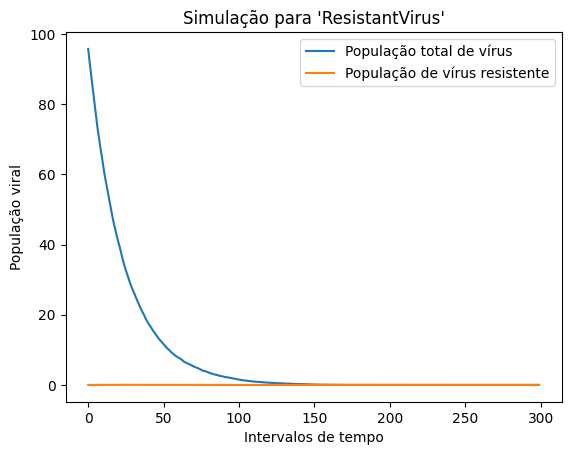

In [85]:
def simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances, mutProb, numTrials):
    """
    Executa uma simulação com medicamentos e registra os resultados.

    Parâmetros:
        numViruses (int): Número inicial de vírus.
        maxPop (int): Capacidade máxima da população viral.
        maxBirthProb (float): Probabilidade máxima de reprodução dos vírus.
        clearProb (float): Probabilidade máxima de eliminação dos vírus.
        resistances (dict): Resistências iniciais dos vírus.
        mutProb (float): Probabilidade de mutação dos vírus.
        numTrials (int): Número de testes a serem executados.

    Retorno:
        None. Exibe gráficos com os resultados da simulação.
    """
    # Parâmetros da simulação
    steps = 300
    treatOnStep = 150

    # Armazena os resultados de todas as simulações
    trialResultsTot = [[] for _ in range(steps)]
    trialResultsRes = [[] for _ in range(steps)]

    for _ in range(numTrials):
        # Inicializa os vírus e o paciente
        viruses = [ResistantVirus(maxBirthProb, clearProb, resistances.copy(), mutProb) for _ in range(numViruses)]
        patient = TreatedPatient(viruses, maxPop)

        # Simula as etapas de tempo
        for step in range(steps):
            if step == treatOnStep:
                patient.addPrescription("guttagonol")
            patient.update()

            # Registra os resultados para a etapa atual
            trialResultsTot[step].append(patient.getTotalPop())
            trialResultsRes[step].append(patient.getResistPop(["guttagonol"]))

    # Calcula a média dos resultados em todas as simulações
    resultsSummaryTot = [sum(trial) / len(trial) for trial in trialResultsTot]
    resultsSummaryRes = [sum(trial) / len(trial) for trial in trialResultsRes]

    # Gera os gráficos
    pylab.plot(resultsSummaryTot, label="População total de vírus")
    pylab.plot(resultsSummaryRes, label="População de vírus resistente")
    pylab.title("Simulação para 'ResistantVirus'")
    pylab.xlabel("Intervalos de tempo")
    pylab.ylabel("População viral")
    pylab.legend(loc="best")
    pylab.show()

# Executa a simulação com os parâmetros fornecidos
simulationWithDrug(
    numViruses=100,
    maxPop=1000,
    maxBirthProb=0.1,
    clearProb=0.05,
    resistances={'guttagonol': False},
    mutProb=0.005,
    numTrials=150
)

Conforme o gráfico acima, com a introdução do medicamento antiviral fictício, "guttagonol" a população total de vírus decai de forma acentuada, indicando que o medicamento está sendo eficaz no combate ao vírus.